<a href="https://colab.research.google.com/github/vsjamwal/Algo-trading-Strategies-/blob/main/BTC_USD_buying_strategy_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


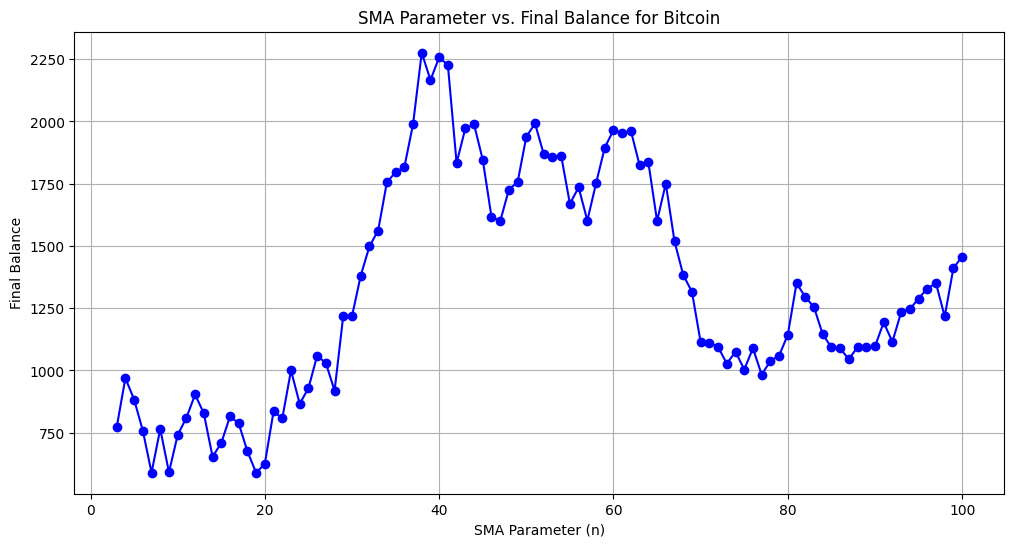

Optimal SMA parameter for Bitcoin: 38
Final balance for Bitcoin: 2276.0202840780603


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical price data for Bitcoin for the last 5 years
bitcoin_data = yf.download('BTC-USD', period='5y')

def sma_strategy(data, sma):
    data['SMA'] = data['Close'].rolling(sma).mean()
    data['Position'] = np.where(data['Close'] > data['SMA'], 1, 0)
    data['Position'] = data['Position'].shift(1)  # Shift the position signal to avoid look-ahead bias
    data['Returns'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Position'] * data['Returns']

def calculate_cumulative_return(data, balance=100):
    data['Balance'] = balance * (1 + data['Strategy_Return']).cumprod()
    return data

best_sma = 0
best_return = 0

results = []

for sma in range(3, 101):
    bitcoin_copy = bitcoin_data.copy()
    sma_strategy(bitcoin_copy, sma)
    cumulative_return = calculate_cumulative_return(bitcoin_copy)
    final_balance = cumulative_return['Balance'].iloc[-1]

    results.append((sma, final_balance))

    if final_balance > best_return:
        best_return = final_balance
        best_sma = sma

results_df = pd.DataFrame(results, columns=['SMA', 'Final Balance'])

# Plot the relationship between SMA values and final balance
plt.figure(figsize=(12, 6))
plt.plot(results_df['SMA'], results_df['Final Balance'], marker='o', linestyle='-', color='b')
plt.title('SMA Parameter vs. Final Balance for Bitcoin')
plt.xlabel('SMA Parameter (n)')
plt.ylabel('Final Balance')
plt.grid(True)

plt.show()

print("Optimal SMA parameter for Bitcoin:", best_sma)
print("Final balance for Bitcoin:", best_return)


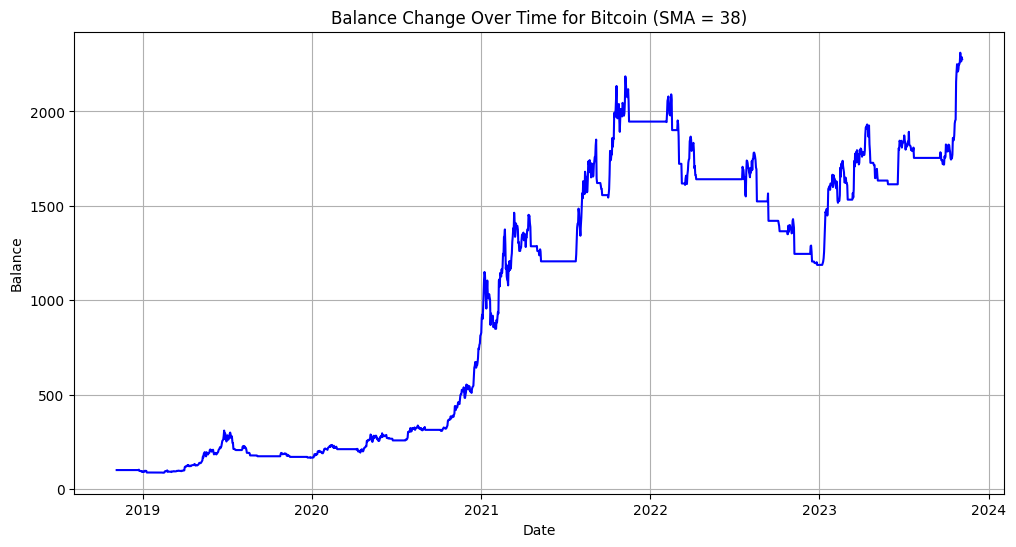

In [26]:
def sma_strategy(data, sma):
    data['SMA'] = data['Close'].rolling(sma).mean()
    data['Position'] = np.where(data['Close'] > data['SMA'], 1, 0)
    data['Position'] = data['Position'].shift(1)  # Shift the position signal to avoid look-ahead bias
    data['Returns'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Position'] * data['Returns']

def calculate_cumulative_return(data, balance=100):
    data['Balance'] = balance * (1 + data['Strategy_Return']).cumprod()
    return data

best_sma = 38  # Use the optimal SMA parameter you found

bitcoin_copy = bitcoin_data.copy()
sma_strategy(bitcoin_copy, best_sma)
cumulative_return = calculate_cumulative_return(bitcoin_copy)

# Plot the balance change over time
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return.index, cumulative_return['Balance'], color='b')
plt.title('Balance Change Over Time for Bitcoin (SMA = 38)')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.grid(True)

plt.show()


In [27]:
# Calculate Sharpe Ratio
def calculate_sharpe_ratio(data):
    returns = data['Strategy_Return']
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)  # Assuming 252 trading days in a year
    return sharpe_ratio

sharpe_ratio = calculate_sharpe_ratio(bitcoin_copy)

# Calculate Maximum Drawdown
def calculate_max_drawdown(data):
    cumulative_balance = data['Balance']
    max_balance = cumulative_balance.cummax()
    drawdown = (cumulative_balance - max_balance) / max_balance
    max_drawdown = drawdown.min()
    return max_drawdown

max_drawdown = calculate_max_drawdown(cumulative_return)

# Calculate Value at Risk (VaR)
def calculate_var(data, confidence_level=0.05):
    returns = data['Strategy_Return']
    var = -returns.quantile(confidence_level)
    return var

var_95 = calculate_var(bitcoin_copy)

# Calculate Annualized Return
def calculate_annualized_return(data):
    cumulative_return = data['Balance'].iloc[-1]
    num_years = len(data) / 252  # Assuming 252 trading days in a year
    annualized_return = (cumulative_return ** (1 / num_years)) - 1
    return annualized_return

annualized_return = calculate_annualized_return(cumulative_return)

# Display the metrics
print("Optimal SMA parameter for Bitcoin:", best_sma)
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Value at Risk (95%):", var_95)
print("Annualized Return:", annualized_return)



Optimal SMA parameter for Bitcoin: 38
Sharpe Ratio: 1.303113120011518
Maximum Drawdown: -0.46411559207667935
Value at Risk (95%): 0.032183589715746364
Annualized Return: 1.9046058453398604


[*********************100%%**********************]  1 of 1 completed


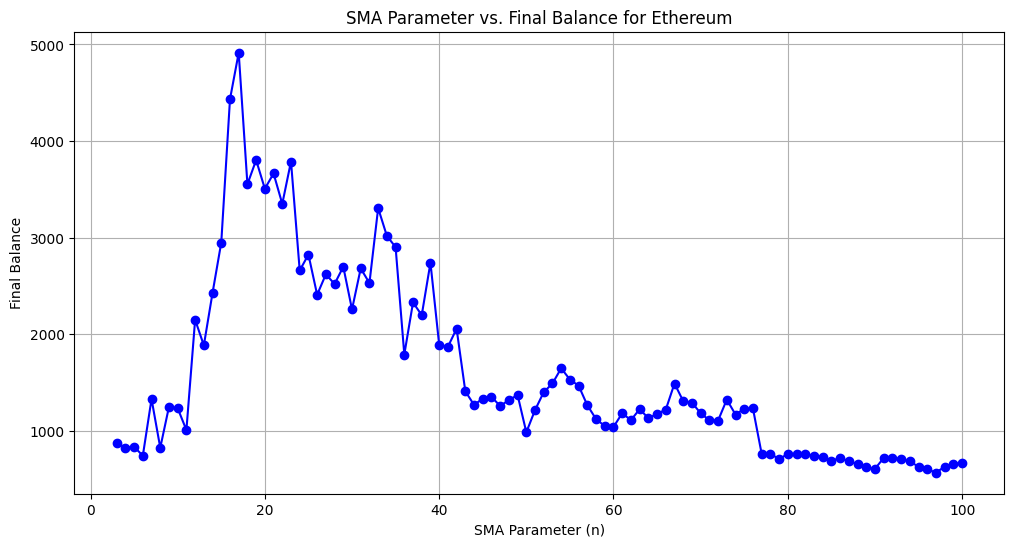

Optimal SMA parameter for Ethereum: 17
Max final balance for Ethereum: 4914.118379423789


In [28]:
# Download historical price data for Ethereum for the last 5 years
ethereum_data = yf.download('ETH-USD', period='5y')

def sma_strategy(data, sma):
    data['SMA'] = data['Close'].rolling(sma).mean()
    data['Position'] = np.where(data['Close'] > data['SMA'], 1, 0)
    data['Position'] = data['Position'].shift(1)  # Shift the position signal to avoid look-ahead bias
    data['Returns'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Position'] * data['Returns']

def calculate_cumulative_return(data, balance=100):
    data['Balance'] = balance * (1 + data['Strategy_Return']).cumprod()
    return data

best_sma_eth = 0
best_return_eth = 0

results_eth = []

for sma in range(3, 101):
    ethereum_copy = ethereum_data.copy()
    sma_strategy(ethereum_copy, sma)
    cumulative_return_eth = calculate_cumulative_return(ethereum_copy)
    final_balance_eth = cumulative_return_eth['Balance'].iloc[-1]
    results_eth.append((sma, final_balance_eth))

    if final_balance_eth > best_return_eth:
        best_return_eth = final_balance_eth
        best_sma_eth = sma

results_df_eth = pd.DataFrame(results_eth, columns=['SMA', 'Final Balance'])

# Plot the relationship between SMA values and final balance for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(results_df_eth['SMA'], results_df_eth['Final Balance'], marker='o', linestyle='-', color='b')
plt.title('SMA Parameter vs. Final Balance for Ethereum')
plt.xlabel('SMA Parameter (n)')
plt.ylabel('Final Balance')
plt.grid(True)
plt.show()

print("Optimal SMA parameter for Ethereum:", best_sma_eth)
print("Max final balance for Ethereum:", best_return_eth)

Optimal SMA parameter for Ethereum: 17
Sharpe Ratio: 1.3008820120475675
Maximum Drawdown: -0.3926328214591266
Value at Risk (95%): 0.04175344749740187
Annualized Return: 2.22972029325487


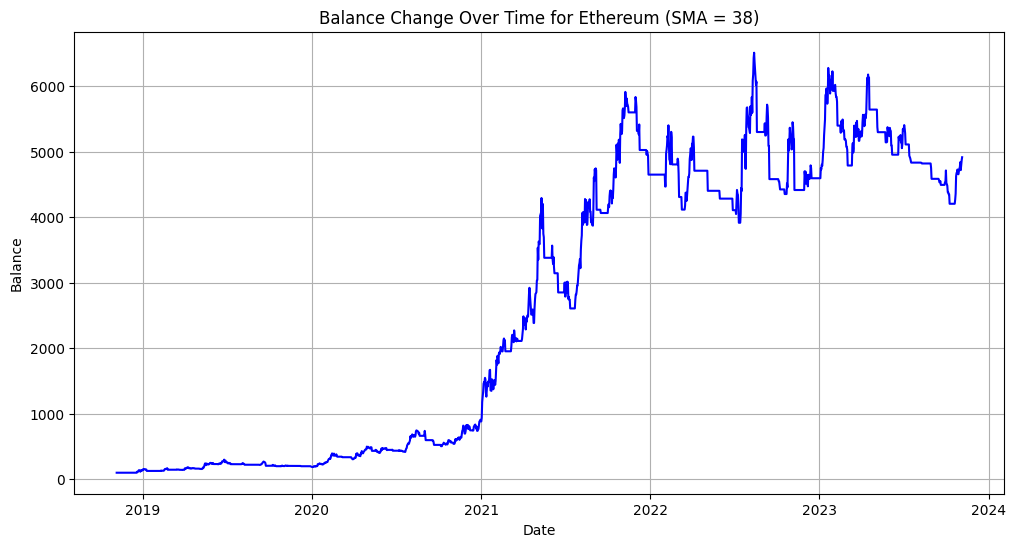

In [29]:
def sma_strategy(data, sma):
    data['SMA'] = data['Close'].rolling(sma).mean()
    data['Position'] = np.where(data['Close'] > data['SMA'], 1, 0)
    data['Position'] = data['Position'].shift(1)  # Shift the position signal to avoid look-ahead bias
    data['Returns'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Position'] * data['Returns']

def calculate_cumulative_return(data, balance=100):
    data['Balance'] = balance * (1 + data['Strategy_Return']).cumprod()
    return data

best_sma_eth = 17  # Use the optimal SMA parameter you found for Ethereum

ethereum_copy = ethereum_data.copy()
sma_strategy(ethereum_copy, best_sma_eth)
cumulative_return_eth = calculate_cumulative_return(ethereum_copy)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(data):
    returns = data['Strategy_Return']
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)  # Assuming 252 trading days in a year
    return sharpe_ratio

sharpe_ratio_eth = calculate_sharpe_ratio(ethereum_copy)

# Calculate Maximum Drawdown
def calculate_max_drawdown(data):
    cumulative_balance = data['Balance']
    max_balance = cumulative_balance.cummax()
    drawdown = (cumulative_balance - max_balance) / max_balance
    max_drawdown = drawdown.min()
    return max_drawdown

max_drawdown_eth = calculate_max_drawdown(cumulative_return_eth)

# Calculate Value at Risk (VaR)
def calculate_var(data, confidence_level=0.05):
    returns = data['Strategy_Return']
    var = -returns.quantile(confidence_level)
    return var

var_95_eth = calculate_var(ethereum_copy)

# Calculate Annualized Return
def calculate_annualized_return(data):
    cumulative_return = data['Balance'].iloc[-1]
    num_years = len(data) / 252  # Assuming 252 trading days in a year
    annualized_return = (cumulative_return ** (1 / num_years)) - 1
    return annualized_return

annualized_return_eth = calculate_annualized_return(cumulative_return_eth)

# Display the metrics
print("Optimal SMA parameter for Ethereum:", best_sma_eth)
print("Sharpe Ratio:", sharpe_ratio_eth)
print("Maximum Drawdown:", max_drawdown_eth)
print("Value at Risk (95%):", var_95_eth)
print("Annualized Return:", annualized_return_eth)

# Plot the balance change over time
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return_eth.index, cumulative_return_eth['Balance'], color='b')
plt.title('Balance Change Over Time for Ethereum (SMA = 38)')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.grid(True)

plt.show()
